### CMSE 202 Final Project, Section 003

Benjamin Laubach, Sanskriti Verma, Carrie Neilsen, Tori Fallon, Ella Kovach and Jason Williams

## Research Question

How do varying factors affect moss growth in an environment?

## Background and Motivation



Our project is an Agent-Based Model (ABM) similar to those that we have focused on in class, we took inspiration from the environment class from homework 3 as well as the bacteria model earlier in the semester. When thinking about how to approach this project we discussed the basic needs of the model which included creating a board and then having a class for the growth of the moss. From some research we arrived at the conclusion that weeds are a direct competitor to moss growth as well as trees, these were two features we wanted to include in our classes as well as some others which included the level of moisture in the ground so whether the moss was growing on wet land or dry land. 

Moss is able to grow in drought-like environments therefore are able to grow on dryland and need very little water or light to survive. To add complexity to our model we included dry land into our environment function which the moss is able to grow on but the weeds are not. Some other complexity which was included is: fertile land which the moss leaves behind after the agent is dead, this provides a new cell type for the weeds to grow on top of in the simulation. Initially, the environment is filled with normal land which both agents are able to grow on. The final complexity we included is having trees with multiple radii implemented into the function. The purpose of the trees is to create obstructions around the board which take up space where other agents are able to grow. 

## Methodology

In [ ]:
#Insert Code

## Discussion and Conclusion

### Overview of the classes 

**MOSS CLASS: Our base class for our model is the moss class. The moss class is similar in ways to the animal class from homework three, inspiration was taken from the age functions and the check if dead function.**

* Our first function is the 'init' function, this initialises the basic variables which are used in our code. we needed to initialise the: maximum x position, maximum y position, the sex, the shape and the growth rate. This defines parameters for both the ABM board as well as for the moss itself.


* We defined a function "ageing", this is a basic function which updated the age of the moss after every iteration. This function is paired with the "check if dead" function which sets an age limit of 5 iterations for each moss, the "check if dead" function takes this age limit and compares it to each moss on the board and returns a true or false value as to whether each moss has reached the age limit or not. If the moss is determined to be dead, this is then removed from the board in the environment class.


* The "replicate" function finds all of the adjacent cells for each of the mosses from here it then randomises the order of the adjacent cells on the board, using a for loop the code picks a random cell which is first checked to be within the bounds of the environment. Once the cell is determined to be within the bounds, the code determines if the cell is empty or not, if the cell is empty then moss can grow in the cell. To determine the rate of growth the code checks the cell type as to whether the cell is fertile or dry land, moss can grow on both but the fertile land has a growth rate of 0.9 compared to the dry land's growth rate of 0.3. Once the code has checked through all of the variables a moss replicate is spawned in a random adjacent cell, this step is repeated numerously throughout the stimulation. There is a final if statement which removes any previous occupants of the cell from the board if a new occupant has grown there.



**WEED CLASS: After doing some research into what affects moss growth we decided to include two other classes, the first being the weed class which adds a competitor alongside the moss. This was the first layer of complexity that we added to our model.**


* The init function initialises the same inputs as the moss class, then uses the moss class to reinitialise these inputs in the new class. In these cases, the moss class is acting as a parent or base class and the weed class is acting as a child or derived class.


* The replicate class is the same for both the moss and weed classes as mentioned above it checks through a list of parameters to randomise where the new weed will spawn from, this is similar to the moss class for this function. The main difference between the two replicate functions is that the code now produces a weed instead of a moss and that the weeds can grow on top of the moss as they are the main competitor. This is the same as dry land vs fertile land for the moss replicate function except, the growth rate of the weeds on top of a cell containing moss is 0.65.


**ENVIRONMENT CLASS: The second layer of complexity we included was by creating an environment class, the aim of this class was to create the addition of trees and ground moisture into our ABM model. For the environment class, the 'init' function differs from both the moss and weed classes.**


* The new 'init' function initialises the number of trees and their radius, this allows the next function 'place trees' to take the number of trees (if greater than zero) and randomise an x and y coordinate and sets it equal to 2, this is now considered a cell where a tree has been built. 


* The "place trees" function then uses a for loop to iterate over all of the cells around and in the tree's (circle's) radius, if the cell is in the circle radius then the tree is "built" in that cell. It does this by randomising x and y coordinates to place the tree on the board. Once the tree coordinates have been set a for loop iterates over a range of ± the tree radius. There are two conditions, the first being if $i^2$ + $j^2$ <= self.tree_radius$^2$, this is used to set the x and y coordinates for where the tree is subsequently placed. The second condition is if $i^2$ + $j^2$ > (self.tree_radius-1)$^2$: then self.environ[x][y] = 4. In this condition, the tree is not placed. If the sum of the squares of i and j is equal to 4, the cell is considered to be fertile land which is available for both moss and weeds to grow whereas if the sum of the squares of i and j is 2 then the cell is considered to have something already built inside it whether that is a moss, a weed or a tree.


* The "add agent" function appends the agent to the agent list, the code also identifies the coordinates for the new agent and appends them to the x and y lists respectively. An if-else statement is then used to check if the agent is a moss and if the coordinates are equal to 0, else the agent is not a moss and the coordinates are set equal to -1. These numbers correspond to the colours which are shown in the simulation.


* The simulate function is very similar to the environment simulate function from Homework 3. The first important feature of the simulate function is the definition of what each of the colours are [cell number: cell type: colour]: 

* -1: Weed: Lime
* 0: Moss: Green
* 1: Normal land: Sienna
* 2: Tree: Black
* 3: Dry land: PeachPuff
* 4: Fertile land: Teal

## Simulation Colours:
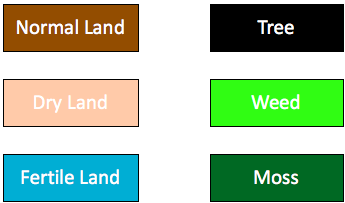


* The colour list for the simulation function is then defined using a dictionary, cmap is used to implement these colours into our function by looping over the values of the dictionary. A for loop by value iterates over the total run time, this for loop is used to implement a time counter above the simulation showing the timestep increasing. A series of nested loops and if else statements loops over the agents in the list and checks if they are the following: the species - whether they are a moss or weed, if the agent is dead - if dead, the agent is removed from the board. If the agent is dead then fertile and dry land cells are set as the moss leaves behind fertile cells and the weeds leave behind dry land. Both weeds and moss can grow on specific cell types, however,  these cell types are not the same for both moss and weeds. Weeds can grow on cell type: 1,4,0 which represents the normal land, fertile land and the cells with moss occupying them as they are a direct competitor to the moss. The moss on the other hand can grow on cells: and 1,3,4 which represent normal land, dry land and fertile land. 


* Originally separated we have implemented the plot simulate function into the simulate function so that the graph which is produced directly correlates with the simulation that is run. When these functions are coded separately this is not the case and so it was important for us to have a graph which was accurate to our model as this is one of the only ways to pull data from the model itself. The initial count is set to zero for both the weed and moss agents and as agents are produced a for loop in plot code from the simulate function keeps track of the number of each type of agent and append this to the graph. 




## Conclusions to determine

* Number of trees
* radius of trees

## References